# Mentoría

## Aprendizaje Supervisado

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el cuarto práctico del proyecto, correspondiente a la materia Aprendizaje Automático Supervisado. El objetivo consiste en profundizar en la aplicación de métodos de aprendizaje supervisado aprendidos en el curso, así como también en métodos de ensemble learning. Esto, siempre a través de experimentos reproducibles y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

A los fines de este práctico, consideraremos el problema original de nuestro proyecto, el cual consiste en un problema de regresión. Nuevamente, al igual que en el práctico anterior, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             mean_squared_error, 
                             classification_report, 
                             roc_curve, 
                             auc,
                             mean_absolute_error,
                             mean_squared_error,
                             r2_score,
                             explained_variance_score
                             )
from sklearn.metrics import 
from sklearn.metrics import 
from sklearn.metrics import 
from sklearn.metrics import 

from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

np.random.seed(0)  # Para mayor determinismo

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Aprendizaje Automático Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset energia_completo. La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos, prácticamente iguales a los del práctico anterior.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.
En esta etapa, nuevamente, pueden adicionar los atributos creados por ustedes que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Kwatts_3_fases`.

#### 3. Análisis del Balance de Clases

¿Cómo luce el balance de clases? ¿Tomarán alguna decisión al respecto?


#### 4. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización, considerando los nuevos modelos propuestos?

Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 5. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.


### II. Aplicación de Modelos de Aprendizaje Automático Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de regresión **para el dataset seleccionado**, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando distintos kernels para la regresión.
2. Random Forest, utilizando parámetros de normalización cuando lo crean pertinente.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:
- Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Finalmente, **combinar los modelos en un clasificador por votos** (pueden implementar VotingClassifier, del módulo de ensemble).

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
   + Mean Absolute Error (MAE)
   + Mean Squared Error (MSE)
   + R2 Score
   + Explaned Variance Score
   
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
   
- ¿Cuál consideran la métrica más apropiada para utilizar en nuestros modelos? ¿Por qué?

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

### CARGA DEL DATASET

In [3]:
#Parsing auxiliar
dateparse = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

_ds_energia = pd.read_csv('https://raw.githubusercontent.com/alaain04/diplodatos/master/data/energia_completo.csv')
_ds_energia['hora'] = _ds_energia.Fecha.apply(lambda x: x[11:13])
_ds_energia['Fecha'] = pd.to_datetime(_ds_energia['Fecha'],format='%Y-%m-%d %H:%M:%S')
_ds_energia.head(5)

,Fecha,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,Kwatts_3_fases,Factor_de_Poten_A,hora
0,2019-12-03 20:45:00,11,11,12,2147483.65,42.16,40.94,-2.147484e+09,0.00,20
1,2019-12-03 20:50:00,11,11,11,0.00,2147483.65,0.00,-2.147484e+09,0.00,20
2,2019-12-03 20:55:00,11,11,12,2147483.65,2147483.65,2147483.65,-2.147484e+09,-0.93,20
3,2019-12-03 21:00:00,11,11,11,2147483.65,0.00,2147483.65,0.000000e+00,0.00,21
4,2019-12-03 21:05:00,10,10,11,35.78,36.54,0.00,-4.342000e+03,-0.51,21


In [4]:
#Elimino datos del día 3/12/2019 para comenzar un dia completo
_ds_energia.drop(_ds_energia[pd.to_datetime(_ds_energia['Fecha'].dt.date)=='2019-12-03'].index,inplace=True)

#Generamos Period Index y ordenamos el dataset de Energia
_ds_energia.index = pd.PeriodIndex(list(_ds_energia['Fecha']), freq='05T')
_ds_energia = _ds_energia.sort_index()


In [5]:
# _ds_clima
_ds_clima = pd.read_csv('https://raw.githubusercontent.com/alaain04/diplodatos/master/data/clima_posadas_20192020.csv')
_ds_clima['time'] = pd.to_datetime(_ds_clima['time'],format='%Y-%m-%d %H:%M:%S')
#Elegimos features del dataset de Clima y los llevamos cada 5 minutos para poder unirlo con el dataset de energia
_ds_clima.index = pd.PeriodIndex(list(_ds_clima['time']), freq='T')
_ds_clima = _ds_clima[['temperature','windspeed','winddirection']].resample('05T').fillna("backfill")
#Ordenamos valores
_ds_clima = _ds_clima.sort_index()

In [6]:
_ds_energia=_ds_energia.join(_ds_clima,how='left')
_ds_energia.head()

,Fecha,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,Kwatts_3_fases,Factor_de_Poten_A,hora,temperature,windspeed,winddirection
2019-12-04 00:00,2019-12-04 00:00:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,26.7,9.4,230.0
2019-12-04 00:05,2019-12-04 00:05:00,9,10,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0
2019-12-04 00:10,2019-12-04 00:10:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0
2019-12-04 00:15,2019-12-04 00:15:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0
2019-12-04 00:20,2019-12-04 00:20:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0


### CURACION DE DATOS

In [7]:
#Calculamos los valores absolutos de la Potencia
_ds_energia['abs_Kwatts'] = _ds_energia['Kwatts_3_fases'].abs()

#Calculamos los valores absolutos de la Potencia
_ds_energia['abs_Potencia'] = _ds_energia['Factor_de_Poten_A'].abs()

#Creamos un campo con la fecha del día solamente
_ds_energia['fecha_dia'] = pd.to_datetime(_ds_energia['Fecha'].dt.date) 

_ds_energia['DiaSemana'] = pd.to_datetime(_ds_energia.fecha_dia.dt.date).dt.day_name()
_ds_energia['mes_desc'] = pd.to_datetime(_ds_energia.fecha_dia.dt.date).dt.month_name()

In [8]:
def get_dia_laboral(nombre_dia):
    if nombre_dia in ['Wednesday', 'Thursday', 'Friday', 'Monday','Tuesday']:
        return 'Dia laboral'
    else:
        return 'Fin de semana'

In [9]:
_ds_energia['es_dia_laboral'] = _ds_energia['DiaSemana'].apply(lambda x:get_dia_laboral(x))

In [10]:
# instanciamos clases
le_dia_semana = preprocessing.LabelEncoder()
le_dia_laboral = preprocessing.LabelEncoder()

In [11]:
# Ejecutamos la funcion entrena el modelo de codificación
le_dia_semana.fit(_ds_energia['DiaSemana'])
le_dia_laboral.fit(_ds_energia['es_dia_laboral'])

LabelEncoder()

In [12]:
# View encoder mapping
dict(zip(le_dia_semana.classes_,le_dia_semana.transform(le_dia_semana.classes_)))

{'Friday': 0,
 'Monday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Thursday': 4,
 'Tuesday': 5,
 'Wednesday': 6}

In [13]:
dict(zip(le_dia_laboral.classes_,le_dia_laboral.transform(le_dia_laboral.classes_)))

{'Dia laboral': 0, 'Fin de semana': 1}

In [14]:
# transfomr -> ejecuta el modelo y retorna el array con los datos transformados

_ds_energia['DiaSemana_Transform'] = le_dia_semana.transform(_ds_energia['DiaSemana']) 
_ds_energia['Es_dia_laboral_Transform'] = le_dia_laboral.transform(_ds_energia['es_dia_laboral']) 


In [15]:
# obtengo lista de registros outliers
outl = _ds_energia[_ds_energia.abs_Kwatts > (_ds_energia.abs_Kwatts.median() + 3 * _ds_energia.abs_Kwatts.median())] 
_valor_outlier = _ds_energia.abs_Kwatts.median() + 3 * _ds_energia.abs_Kwatts.median()
print('Límite máximo de consumo para considerar outliers: ' + str(_valor_outlier) )

Límite máximo de consumo para considerar outliers: 14280.0


In [16]:
#Reemplazamos Nan en tensiones
_ds_energia.loc[ ( _ds_energia['Vab'].isna()), 'Vab'] = 0
_ds_energia.loc[ ( _ds_energia['Vca'].isna()), 'Vca'] = 0
_ds_energia.loc[ ( _ds_energia['Vbc'].isna()), 'Vbc'] = 0
#Reemplazamos outliers en tensiones
_ds_energia.loc[ ( _ds_energia['Vab'] > _ds_energia.Vab.median() + 3 * _ds_energia.Vab.median() ), 'Vab'] = 0 #_ds_energia.Vab.median() + 3 * _ds_energia.Vab.median()
_ds_energia.loc[ ( _ds_energia.Vca > _ds_energia.Vca.median() + 3 * _ds_energia.Vca.median() ) , 'Vca'] = 0 #_ds_energia.Vca.median() + 3 * _ds_energia.Vca.median()
_ds_energia.loc[ ( _ds_energia['Vbc'] > _ds_energia.Vbc.median() + 3 * _ds_energia.Vbc.median() ), 'Vbc'] = 0 #_ds_energia.Vbc.median() + 3 * _ds_energia.Vbc.median()

In [17]:
# convertimos los nan de abs_Kwatts en valor 0 si es nan 'Kwatts 3 fases' y 'Amper fase T-A'== 0, luego se marcará como un corte de energia
_ds_energia.loc[ ( _ds_energia['Amper_fase_R_A'].isna()) & (_ds_energia['Amper_fase_T_A'] == 0), 'Amper_fase_R_A'] = 0
_ds_energia.loc[ ( _ds_energia['Amper_fase_S_A'].isna()) & (_ds_energia['Amper_fase_T_A'] == 0), 'Amper_fase_S_A'] = 0
_ds_energia.loc[ ( _ds_energia['Kwatts_3_fases'].isna()) & (_ds_energia['Amper_fase_T_A'] == 0), 'abs_Kwatts'] = 0

In [18]:
#Evaluamos si hubo un corte de energia (o sea, si la potencia total es igual a 0)
_ds_energia.loc[_ds_energia.abs_Kwatts == 0, 'corte_energia'] = 1
_ds_energia.loc[(_ds_energia['Factor_de_Poten_A']<=0) & (_ds_energia['Kwatts_3_fases']>0),
                                               'corte_energia'] = 1
_ds_energia.loc[(_ds_energia['Factor_de_Poten_A']>0) & (_ds_energia['Kwatts_3_fases']<0),
                                               'corte_energia'] = 1                                               

_ds_energia.loc[_ds_energia.abs_Kwatts != 0, 'corte_energia'] = 0

_ds_energia.loc[_ds_energia.Vca == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia.Vab == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia.Vbc == 0, 'corte_energia'] = 1

_ds_energia.loc[_ds_energia['Amper_fase_R_A'] == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia['Amper_fase_T_A'] == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia['Amper_fase_S_A'] == 0, 'corte_energia'] = 1


#Cambiamos outliers sólo en columna nueva
#Evaluamos si hay los outliers de la potencia
_ds_energia.loc[_ds_energia.abs_Kwatts > _valor_outlier, 'outlier_Kwatts'] = 1
_ds_energia.loc[_ds_energia.abs_Kwatts <= _valor_outlier, 'outlier_Kwatts'] = 0


#Decidimos reemplazar los valores outliers de Potencia por 0 ya que consideramos que fue un error de medición y que para poder graficar los datos, necesitamos que no estén.
_ds_energia.loc[_ds_energia['outlier_Kwatts']==1, 'abs_Kwatts'] = 0

_ds_energia.abs_Kwatts.fillna(value=0,inplace=True)
_ds_energia.winddirection.fillna(value=0,inplace=True)
_ds_energia.windspeed.fillna(value=0,inplace=True)

In [19]:
#Verifico Nan
_ds_energia[_ds_energia.abs_Kwatts.isna()==True].abs_Kwatts.count()

0

In [20]:
#Creamos la columna target seteando un 1 suponiendo que hay energia, para luego evaluar la columna de potencia y asignarle 0 en caso contrario
_ds_energia['target'] = 1
_ds_energia.loc[_ds_energia.abs_Kwatts <= 100, 'target'] = 0
_ds_energia.loc[_ds_energia.corte_energia==1, 'target'] = 0


In [21]:
print('Porcentaje de valor 1 (con distribución de energia) ' + str(_ds_energia[_ds_energia.target==1].Fecha.count()/_ds_energia.Fecha.count()))
print('Porcentaje de valor 0 (sin distribución de energia) ' + str(_ds_energia[_ds_energia.target==0].Fecha.count()/_ds_energia.Fecha.count()))

Porcentaje de valor 1 (con distribución de energia) 0.5311325654578228
Porcentaje de valor 0 (sin distribución de energia) 0.46886743454217716


In [22]:
#Funcion para normalizar los campos numéricos de 0 a 1
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [23]:
#Funcion para normalizar los campos numéricos de -1 a 1
def normalize_alternativa(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name != 'target':
            _mean = df[feature_name].mean()
            _std = df[feature_name].std()
            result[feature_name] = (df[feature_name] - _mean) / (_std)
    return result

In [24]:
dt_normalizado = normalize(_ds_energia.drop(columns=['Kwatts_3_fases','Factor_de_Poten_A','outlier_Kwatts','corte_energia','es_dia_laboral','mes_desc','DiaSemana','fecha_dia','hora','Fecha']))
dt_normalizado.sample(5)

,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,temperature,windspeed,winddirection,abs_Kwatts,abs_Potencia,DiaSemana_Transform,Es_dia_laboral_Transform,target
2019-12-28 21:15,0.000000,0.000000,0.000000,0.627813,0.636568,0.626986,0.885057,0.000000,0.000000,0.704782,0.909091,0.333333,1.0,0.0
2020-04-26 21:20,0.000000,0.000000,0.000000,0.698488,0.717541,0.702217,0.545977,0.202166,0.388889,0.476909,0.979798,0.500000,1.0,0.0
2020-02-04 05:50,0.176471,0.170455,0.157895,0.703411,0.719268,0.676907,0.626437,0.032491,0.250000,0.538174,0.949495,0.833333,0.0,1.0
2019-12-15 19:30,0.000000,0.000000,0.000000,0.678446,0.685083,0.649328,0.511494,0.137184,0.944444,0.414825,0.959596,0.500000,1.0,0.0
2020-03-05 13:45,0.223529,0.215909,0.200000,0.000000,0.000000,0.000000,0.683908,0.202166,0.250000,0.476207,0.898990,0.666667,0.0,0.0


In [25]:
dt_normalizado_alternativa = normalize_alternativa(_ds_energia.drop(columns=['Kwatts_3_fases','Factor_de_Poten_A','outlier_Kwatts','corte_energia','es_dia_laboral','mes_desc','DiaSemana','fecha_dia','hora','Fecha']))
dt_normalizado_alternativa.sample(3)

,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,temperature,windspeed,winddirection,abs_Kwatts,abs_Potencia,DiaSemana_Transform,Es_dia_laboral_Transform,target
2020-05-12 08:55,0.748229,0.830054,0.812678,0.535432,0.592421,0.590561,-0.203580,-0.136534,-0.580778,-0.341660,0.490295,0.998372,-0.631778,1
2020-05-28 17:05,1.354979,1.302490,1.343396,0.327013,0.382363,0.385062,0.488180,0.572778,-1.015661,-0.350846,-0.127704,0.499266,-0.631778,1
2020-03-29 21:20,-0.667520,-0.634500,-0.646794,-1.758945,-1.771301,-1.767991,1.047476,-0.136534,0.180268,0.940847,0.381236,0.000160,1.582811,0


### SEPARACION DE DATOS X, y


#### Realizamos una normalizacion con valores entre 0 y 1. En Random Forest, no es necesario normalizar, pero sí en Redes Neuronales y Regresión Lineal.
Además, al elegir variables como temperatura (que varia entre 15 y 40) y otras como la potencia (que puede llegar a valores en torno a los 7000) es requerido normalizar la información para que las variables queden en una misma escala.

In [26]:
# división entre entrenamiento y evaluación
dt_normalizado = dt_normalizado.dropna()

X = dt_normalizado.iloc[:, dt_normalizado.columns != 'target']
y = dt_normalizado.target



##### Separamos los datos de Train para entrenar y validar

In [90]:
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [91]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((52248, 13), (52248,), (13062, 13), (13062,))

## La proporción cambia al considerar también cortes de energía cuando las tensiones y corrientes están en 0.
## Pasamos de tener una proporción de 90/10 a 53/47


In [29]:
print('Proporción de valor 1 y 0 en el set de training) \n' + str(y_train.value_counts()/y_train.shape[0]) )
print('\nProporción de valor 1 y 0 en el set de testing) \n' + str(y_test.value_counts()/y_test.shape[0]) )

Proporción de valor 1 y 0 en el set de training) 
1.0    0.532441
0.0    0.467559
Name: target, dtype: float64

Proporción de valor 1 y 0 en el set de testing) 
1.0    0.532078
0.0    0.467922
Name: target, dtype: float64


#### Matriz de correlación para determinar los atributos a seleccionar para los modelos de clasificaicón



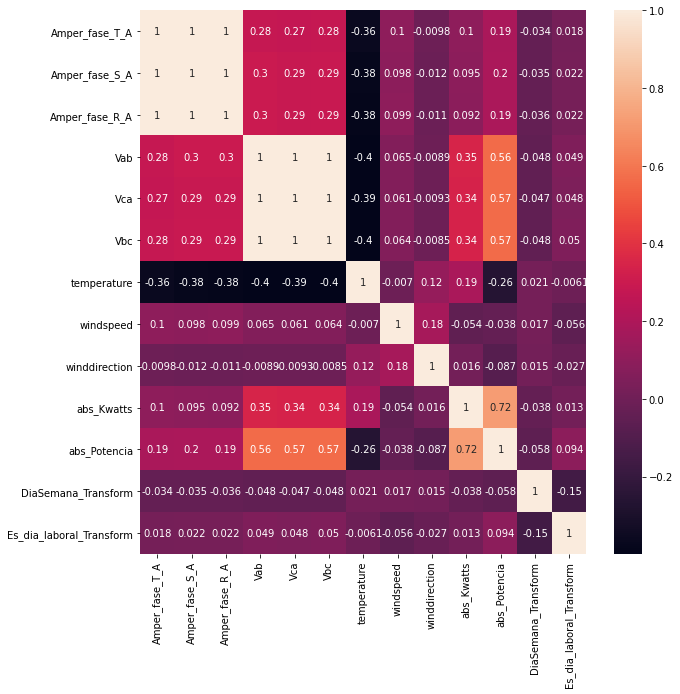

In [30]:
#Matriz de correlación para seleccionar las variables a utilizar
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True)

Seleccionamos los atributos  abs_Kwatts y temperature

In [92]:
X_train = X_train[['abs_Kwatts',  'temperature']]
X_test = X_test[['abs_Kwatts',  'temperature']]

### Aplicación de Modelos de Aprendizaje Automático Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de regresión para el dataset seleccionado


1.  Support Vector Machines (SVM), probando distintos kernels para la regresión.
2.  Random Forest, utilizando parámetros de normalización cuando lo crean pertinente.
3.  Red neuronal.


#### Graficamos la distribución de los puntos para las variables seleccionadas

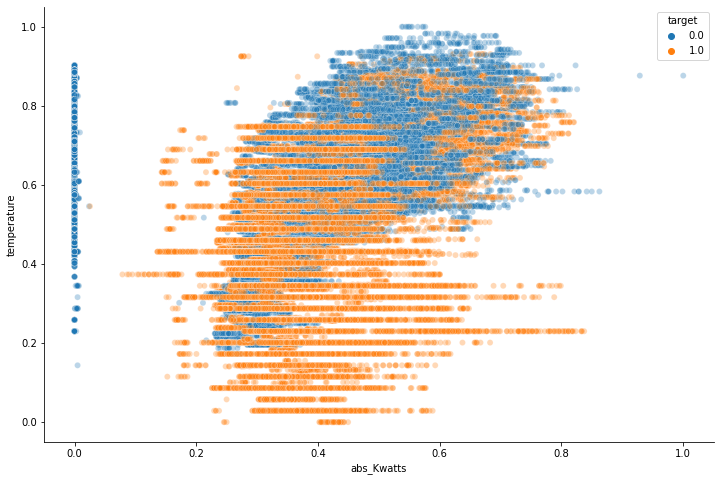

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dt_normalizado.abs_Kwatts, 
                y=dt_normalizado.temperature,
                hue=dt_normalizado.target, alpha=.3)
sns.despine()
plt.show()

In [33]:
#Para almacenar resultados de Gridsearch
results = pd.DataFrame(columns=('clf', 'best_acc'))

#### MODELO LinearSVC






##### Hiperparámetros por defecto

In [34]:
# SOPORTE DE VECTORES (svm)
svm_lin_reg = svm.LinearSVC()
svm_lin_reg.fit(X_train, np.array(y_train))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [35]:
_pred_train = svm_lin_reg.predict(X_train,)
_pred_test = svm_lin_reg.predict(X_test)

In [36]:
accuracy_score( np.array(y_test),_pred_test)

0.6107793599755015

In [37]:
confusion_matrix(np.array(y_test),_pred_test, )

array([[3114, 2998],
       [2086, 4864]])

In [38]:
# Reporte de clasificación para set de datos de test
print(classification_report(np.array(y_test),_pred_test, ))

              precision    recall  f1-score   support

         0.0       0.60      0.51      0.55      6112
         1.0       0.62      0.70      0.66      6950

    accuracy                           0.61     13062
   macro avg       0.61      0.60      0.60     13062
weighted avg       0.61      0.61      0.61     13062



##### Búsqueda exhautiva de hiperparámetros

In [39]:
svm_linc_params = {
    'C':[0.5,1.0,2], 
    'class_weight':[None, 'balanced'], 
    'dual':[True,False], 
    'fit_intercept':[True],
    'intercept_scaling':[1], 
    'loss':['hinge','squared_hinge'], 
    'max_iter':[1000,1500,2000],
    'multi_class':['ovr'], 
    'penalty':['l2','l1'],  
    'tol':[0.001,0.0001, 0.00001]
}

In [40]:
svm_lin_c = svm.LinearSVC(random_state=0)

#cross validation de 4
gs = GridSearchCV(svm_lin_reg, svm_linc_params,scoring='accuracy', cv=4,n_jobs=-1)

In [41]:
gs.fit(X_train,np.array(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=4, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 2], 'class_weight': [None, 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True],
                         'intercept_scaling': [1],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [1000, 1500, 2000], 'multi_class': ['ovr'],
                         'penalty': ['l2', 'l1'],
                         'tol': [0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', ver

In [42]:
# mejores parametros para el score = accuracy
gs.best_params_

{'C': 2,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'tol': 0.0001}

In [43]:
_pred_train = gs.best_estimator_.predict(X_train)
_pred_test  = gs.best_estimator_.predict(X_test)

In [44]:
accuracy_score(np.array(y_train),_pred_train)

0.6295743377736946

In [45]:
accuracy_score(np.array(y_test),_pred_test)

0.6234879804011637

In [46]:
results = results.append({'clf': gs, 'best_acc': gs.best_score_}, ignore_index=True)
results['best_acc'][0]


0.6296126167508804

### MODELO RandomForest

##### Hiperparámetros por defector

In [47]:
rf = ensemble.RandomForestClassifier(random_state=0)

In [48]:
rf.fit(X_train, np.array(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
_pred_train = rf.predict(X_train)
_pred_test = rf.predict(X_test)

In [50]:
accuracy_score(np.array(y_train), _pred_train)

0.9831955290154647

In [51]:
accuracy_score(np.array(y_test), _pred_test)

0.8098300413412953

In [52]:
confusion_matrix(np.array(y_test),_pred_test, )

array([[4853, 1259],
       [1225, 5725]])

In [53]:
print(classification_report(np.array(y_test),_pred_test, ))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80      6112
         1.0       0.82      0.82      0.82      6950

    accuracy                           0.81     13062
   macro avg       0.81      0.81      0.81     13062
weighted avg       0.81      0.81      0.81     13062



##### Búsqueda exhautiva de hiperparámetros

In [54]:
from keras.models import Sequential
from keras.layers import Dense

In [55]:
#Keras usa Bias
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
model.fit(X_train, np.array(y_train),epochs=150,batch_size=25)

Epoch 1/150
2090/2090 [==============================] - 3s 1ms/step - loss: 0.6465 - accuracy: 0.5976
Epoch 2/150
2090/2090 [==============================] - 3s 1ms/step - loss: 0.6061 - accuracy: 0.6256
Epoch 3/150
2090/2090 [==============================] - 2s 1ms/step - loss: 0.5938 - accuracy: 0.6222
Epoch 4/150
2090/2090 [==============================] - 2s 1ms/step - loss: 0.5804 - accuracy: 0.6187
Epoch 5/150
2090/2090 [==============================] - 3s 1ms/step - loss: 0.5701 - accuracy: 0.6209
Epoch 6/150
2090/2090 [==============================] - 3s 1ms/step - loss: 0.5643 - accuracy: 0.6228
Epoch 7/150
2090/2090 [==============================] - 3s 1ms/step - loss: 0.5614 - accuracy: 0.6202
Epoch 8/150
2090/2090 [==============================] - 3s 1ms/step - loss: 0.5598 - accuracy: 0.6224
Epoch 9/150
2090/2090 [==============================] - 3s 1ms/step - loss: 0.5589 - accuracy: 0.6238
Epoch 10/150
2090/2090 [==============================] - 3s 1ms/step - l

In [58]:
_, accuracy = model.evaluate(X_test, np.array(y_test))
print('Accuracy: %.2f' % (accuracy*100))

409/409 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.6752
Accuracy: 67.52


In [59]:
_, accuracy = model.evaluate(X_train, np.array(y_train))
print('Accuracy: %.2f' % (accuracy*100))

1633/1633 [==============================] - 2s 1ms/step - loss: 0.5268 - accuracy: 0.6749
Accuracy: 67.49


In [60]:
# Clasificacion por voto

#definir modelos a usar en la clasificacion

rf = ensemble.RandomForestClassifier(random_state=0,)
clf = tree.DecisionTreeClassifier(random_state=0,)
clf.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
# Creamos la clase de votacion

vot= ensemble.VotingClassifier(estimators=[ ('rf', rf), ('dt', clf)], voting='hard')
vot = vot.fit(X_train, np.array(y_train))

In [62]:
y_pred_train_vot = vot.predict(X_train)
y_pred_valid_vot = vot.predict(X_test)

In [63]:
display("Precisión Train:",accuracy_score(np.array(y_train),y_pred_train_vot ) )
display("Precisión Valid:", accuracy_score(np.array(y_test),y_pred_valid_vot ) )

'Precisión Train:'

0.9832146685040576

'Precisión Valid:'

0.8042413106721789

In [64]:
confusion_matrix(np.array(y_test),y_pred_valid_vot, )

array([[4995, 1117],
       [1440, 5510]])

In [65]:
confusion_matrix(np.array(y_train),y_pred_train_vot, )

array([[24329,   100],
       [  777, 27042]])

In [66]:
#AdaBoost   

In [67]:
from sklearn.ensemble import AdaBoostClassifier


In [68]:
ab_params ={ 'n_estimators': [500,800]
}

In [69]:
ada = AdaBoostClassifier()

In [70]:
gs= GridSearchCV(ada, ab_params, cv=4, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train) 

GridSearchCV(cv=4, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [500, 800]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [71]:
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=800, random_state=None)

In [72]:
gs.best_params_

{'n_estimators': 800}

In [73]:
y_pred_train_ada = gs.best_estimator_.predict(X_train)
y_pred_valid_ada = gs.best_estimator_.predict(X_test)

In [74]:
display("Precisión Train:",accuracy_score(y_train,y_pred_train_ada ) )
display("Precisión Valid:", accuracy_score(y_test,y_pred_valid_ada ) )

'Precisión Train:'

0.7617707854846119

'Precisión Valid:'

0.7550145460113306

In [75]:
pd.crosstab(y_test,y_pred_valid_ada , rownames=['True'], colnames=['Predicción'], margins=True)

Predicción,0.0,1.0,All
True,,,
0.0,4528,1584,6112
1.0,1616,5334,6950
All,6144,6918,13062


## Selección del modelo:

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
   + Mean Absolute Error (MAE)
   + Mean Squared Error (MSE)
   + R2 Score
   + Explaned Variance Score

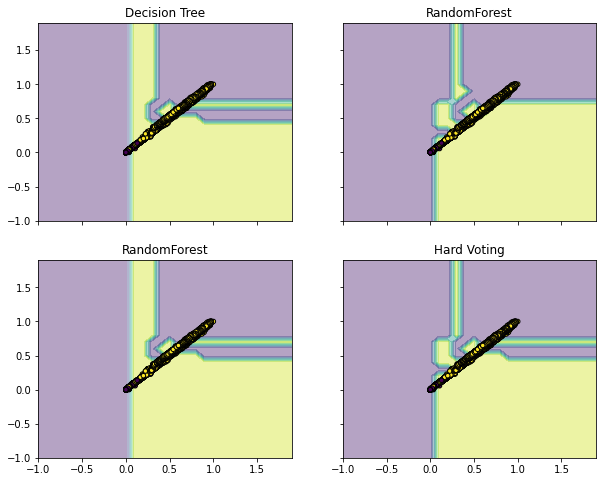

In [76]:
from itertools import product
#Plot the decision boundaries of a VotingClassifier
# Plotting decision regions
x_min, x_max = np.array(X)[:, 0].min() - 1, np.array(X)[:, 0].max() + 1
y_min, y_max = np.array(X)[:, 1].min() - 1, np.array(X)[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf2, tt in zip(product([0, 1], [0, 1]),
                        [rf,clf,rf, vot],
                        ['Decision Tree', 'RandomForest',
                         'RandomForest', 'Hard Voting']):

    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### El modelo seleccionado que mejor se adapta al problema es **RandomForest**

Nuestro problema es determinar si la distribución de energía está cortada o no, por ende, es un problema de caracter Binario.

Nuestra hipótesis, es que la variable target va a ser igual a 0 cuando no haya distribución de energía, y 1 cuando no esté cortada la distribución.

Debido a la distribución de los puntos como se ven en el scartplot, no hay una función lineal o polinomial que permita seprar las clases facilmente.

Esto se debe a que se tomo como clase "Sin energia" aquellos registros que tenian no solo un valor de potencia < 100 kw sino tmabién los que presentaban valores incorrectos en tensión o corriendo (ya que son atributos del que depende la potencia). Si no hay tensión o no hay corriente no puede haber potencia, por lo que los valores NAN o negativos en tensión (en sus tres tipos) o corriente "activa" se lo considera un "corte de energía" 

Sin esta consideranción, los puntos se distribuían de tal forma que un clasificador lineal permitían separar las clases con un 100% de presición.

In [93]:
# división entre entrenamiento y evaluación con todos los atributos
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52248, 2), (13062, 2), (52248,), (13062,))

##### Búsqueda de hiperparametros para RandomForest

In [106]:
parameters = {
    'n_estimators' : [100,150,200],
     'random_state' : [3,4,5],
    'max_features' : ['auto'],
    'criterion'    : ['gini','entropy']
}

model=RandomForestClassifier(random_state=0)
randomtree_clf = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
randomtree_clf.fit(X_train, np.array(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [107]:
print("best mean cross-validation score: {:.3f}".format(randomtree_clf.best_score_))
print("best parameters:", randomtree_clf.best_params_)
print("test-set score: {:.3f}".format(randomtree_clf.score(X_test, y_test)))


best mean cross-validation score: 0.812
best parameters: {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 150, 'random_state': 3}
test-set score: 0.811


In [115]:
y_pred = randomtree_clf.best_estimator_.predict(X_test)

display("Precisión Valid:", accuracy_score(y_test,y_pred ))

'Precisión Valid:'

0.8112080845199816

In [121]:
scoring = [ 'neg_mean_absolute_error','r2','neg_mean_squared_error','explained_variance']
randomtree_clf.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 150,
 'random_state': 3}

In [129]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))

0.18879191548001836
0.18879191548001836
0.24171126972767332
0.24173245696636392
